### FC layer: fully connected layer

In [ ]:
# FC layer: Fully Connected Layer, 혹은 Dense layer
# 이전 layer의 모든 node가 다음 layer의 모든 node에 연결되어서 학습되는 layer 구조
# 쉽게 말해서 지금까지의 학습은 FC layer 였음
# 이전 layer의 출력값이 다음 layer의 입력값으로 사용되었기 때문!

# 지금까지 우리가 작업한 신경망은 모두 FC layer를 이용하고 있었음!
# FC layer의 특징: 입력 데이터(하나의 데이터, 한 사람에 대한 데이터)가 1차원으로 한정됨
# 즉, 각각의 이미지가 1차원으로 표현이 되어야 한다.

# 사실 이미지는 가로 * 세로 * 깊이(명암), 3차원의 데이터
# 그렇지만 FC layer의 특징으로 인해 2차원 이미지(MNIST)를 1차원으로 변환해서 사용했음
# MNIST는 흑백 이미지로 깊이가 불필요하였고, 가로*세로 정보는 784개의 col으로 변환되서 입력으로 넣은 것
# MNIST 예제는 상당히 간단한 이미지 학습, 예측 예제!

# 일반적으로 이미지 학습의 가장 큰 문제는(MNIST 제외 일반 이미지)
# 이미지가 휘어있거나: 각도가 변경되어 있거나
# 크기가 제각각이거나
# 변형이 조금만 생겨도 학습이 힘들어진다.

# 이미지가 항상 같은 각도, 크기, 형태로 주어지지 않기 때문에 학습이 어렵다.
# 따라서 중요한 것은 그만큼 여러 종류의 이미지의 갯수, training data가 많아야 하고,
# 많은 학습시간이 요구된다.

### CNN: convolutional neural network

In [ ]:
# CNN: convolutional neural network
# 이미지를 학습시키는 것에 있어서 현존하는 가장 효율적인 방법
# CNN은 이미지 처리에 특화된 알고리즘 이다. 

# 많은 방법이 연구되어졌다.
# 사람이 학습하는 방식(특징을 인식하는 것)을 모델링하였다. 
# 이미지의 픽셀 값을 그대로 학습하는 것이 아니라 
# 이미지에 대한 특징을 도출해서 labeling 하여 신경망에 넣어서 학습하는 방식을 찾아냈다.

# 하나의 이미지를 28*28 크기로 조정 및 다음과 같은 필터를 적용해서 여러번 학습
# 포토샵 선명하게 하는 효과처럼 이미지를 sharp하게 만들어 학습
# 흑백 이미지로 변환하여 학습 ... etc
# 위와 같이 효과를 적용하였을 때 도드라지는 특징을 여러번! 학습시키는 것이 CNN의 방식이다.

# 위의 과정을 학습할 때, 필터가 늘어나는 만큼 학습에 걸리는 시간이 늘어난다.
# 이에 따라서 필터, 학습 시간이 늘어나면 이미지의 크기를 작게 조정한다.

# 1장의 컬러 사진: width, height, color(depth: rgv 사용): 3차원
# 여러 장의 사진이 사용되는 학습의 총 입력 데이터: 4차원

# 평면화
# 실제 이미지 1장은 3차원이고, 이를 flatten(평면화) 시켜서 1차원으로 표현해야 한다. 
# 그 과정에서 크기를 조절해야되기 때문에 공간에 대한 데이터를 유실할 우려가 있다.
# 이런 데이터 유실 위험성 때문에 학습과 예측 과정에서 문제가 발생한다.

# 공간 데이터 유실 위험성을 없애고, 이미지의 특성을 추출해서 학습을 용이하게 하기 위한 방식 = CNN
# CNN은 공간 데이터 유실을 최소화 시키고, 특색을 도출하고, 한장으로 여러 특색을 도출!
# deep learning 과정 이전에 CNN을 진행하고, 그 값을 FC layer(지금까지 우리가 한 과정)에 넣을 것

In [ ]:
# kernel 혹은 filter
# sharpen, blur, 흑백 등과 같은 효과 필터 또한 3차원: 3차원 이미지에 적용시킬 것이기 때문
# 종류를 말하였지만, 필터는 임의로 만들어짐


# 예시
# 이미지 크기: 32*32*3
# 필터의 크기: 5*5*3
# 필터의 크기는 내가 설정할 수 있지만, depth는 이미지와 동일한 크기여야 한다.
# 이때의 3은 channel이라고 표현: 색상이라고 칭하기는 의미가 너무 좁음
# 하나의 이미지를 표현하는 방식 으로 생각! depth 외에 다른 방식이 이미지를 표현한다면 이 또한 channel
# 컬러사진은 channel 3종류: green, red, blue, 흑백 사진은 gray one channel

# 해당 개념 참고
# http://taewan.kim/post/cnn/
# 이미지 유실 가능성이 생김
# 
# 이때, padding 처리 함: 원본과 동일한 사이즈로 feature map 출력
# 생각해보면 이미지의 중요한 부분은 중앙, 따라서 padding한다고 하여 크게 왜곡되지 않음
# padding을 할 것인지, stride 크기는 얼마일지 등 내가 결정
# 이렇게 된 것이 activation map


# feature map: 커널의 값과 필터 값을 곱해서 더해서 만듦: 계속 커지는 값
# 따라서 relu 함수 적용: 원래 데이터 보다 적게 크기를 줄임(너무 크거나 작아지지 않도록)
# 이렇게 특징을 뽑아내고 이 값을 입력값으로해서 또 convolution
# 이렇게 나온 값들을 가지고 학습을 시킬 것


# pooling layer
# 이미지 자체의 크기가 너무 클 경우: pooling layer 사용 가능
# 왜 stride를 크게 두고 사용하지 않고 pooling layer 사용?
# stride가 커지면 feature를 잘 뽑아내지 못하기 때문: 듬성듬성 뽑아내기 때문

# pooling layer 만드는 법
# 마찬가지로 kernel, strid 존재
# 곱하여 합 연산을 하였던, convolution 연산: feature map
# pooling에서는 mapping

# cnn에서는 대체로 max pool 사용, kernel을 activation map에 mapping했을 때, 가장 큰 값 하나를 뽑음
# 마찬가지로 padding 사용 가능
# 사용하지 않은 경우: size를 원본보다 작게 줄여서 학습에 용이하게 함
# 사용하는 경우: 특징을 더욱 도드라지게 뽑아내기 위함

### CNN code 구현 과정 1
#### sample CNN을 가지고 함수, code에 대해서 알아보아요

In [3]:
# 모듈 삽입

import tensorflow as tf
import numpy as np

In [8]:
# 이미지 데이터

# 입력데이터의 형식 = width * height * depth : 3*3*1 이미지를 이용할 것 (depth가 1이다 = gray image)
# 입력데이터: (이미지개수, wifth, height, depth) : (1,3,3,1) 4차원 배열로 표현
# 총 9개의 데이터가 사용(1-9)
# image shape = (1,3,3,1) 으로 뒤에서 부터 만들어가기

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)

print(f'image의 shape: {image.shape}')

image의 shape: (1, 3, 3, 1)


In [9]:
# filter 정의 

# Activation map을 위한 filter 정의
# (width, height, depth, filter 개수): depth는 이미지의 depth와 동일해야 함
# filter shape = (2,2,1,3)으로 만들기

weight = np.array([[[[1,2,3]],[[1,2,3]]], [[[1,2,3]],[[1,2,3]]]])

print(f'weight shape: {weight.shape}')

weight shape: (2, 2, 1, 3)


In [11]:
# convolution 실행: stride, padding 정의

# stride = 1로 설정 : 가로, 세로를 1씩 움직인다.
# tf.nn.con2d(적용 이미지, filter, strides=[4차원에 맞춰줘야 함], padding='')
# tf에서 제공해주는 convolution 함수

conv2d = tf.nn.conv2d(image, weight, 
                      strides =[1,1,1,1],padding = 'VALID')

print(f'conv2d의 shape: {conv2d.shape}')

# strides=[1,1,1,1]
# 처음과 맨 끝 1은 dummp, 중간 두개가 가로, 세로에 대한 stride 설정 값
# 가로, 세로 이동 크기 1,2 다르게 줄 수야 있지만 이상해짐, 같게 설정!

# pading = 'SAME' : padding 처리하겟다.
# pading = 'VALID' : padding 처리 안하겟다.

sess = tf.Session()
conv2d = sess.run(conv2d)
conv2d

conv2d의 shape: (1, 2, 2, 3)


array([[[[12., 24., 36.],
         [16., 32., 48.]],

        [[24., 48., 72.],
         [28., 56., 84.]]]], dtype=float32)

In [7]:
# pooling layer

# pool = tf.nn.max_pool(해당 convoluted 값, ksize = [kernel size를 4차원에 맞춰주기], padding="")
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1],
                      strides = [1,1,1,1],
                      padding='SAME')
print(f'pool의 shape: {pool.shape}')

pool의 shape: (1, 2, 2, 3)


### CNN code 구현 과정 2
#### Convolutiona 결과 이미지가 원본 이미지에 비해 어떻게 다른지 확인해봐요

In [7]:
# 모듈 삽입

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# data loading 

mnist = input_data.read_data_sets('./data/mnist', one_hot = True)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


img의 shape:(1, 28, 28, 1)


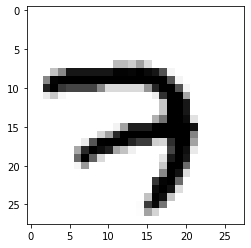

In [4]:
# image 설정

img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap = 'Greys')

# 해당 이미지르 convolutiona 처리를 해보아요
# 입력 데이터: (이미지 개수, width, height, color depth) -> (1,3,3,1)
# 2차원을 4차원으로 바꿔주기

img = img.reshape(-1,28,28,1)
print(f'img의 shape:{img.shape}')

In [5]:
# filter 정의

# 위에서는 임의로 잡았지만 이번에는 random 
W = tf.Variable(tf.random_normal([3,3,1,5]), name = 'filter1')

conv2d의 shape: (1, 14, 14, 5)
conv2d_img의 shape: (5, 14, 14, 1)


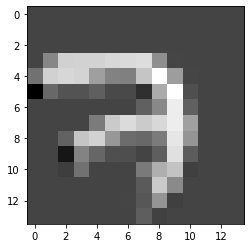

In [22]:
# convolution

# 입력과 출력의 크기가 같게 나오게 하기 위해서는 padding=SAME 뿐 아니라 stride도 1이어야 함
# 
conv2d = tf.nn.conv2d(img, 
                      W,
                      strides = [1,2,2,1],
                      padding = 'SAME')
print(f'conv2d의 shape: {conv2d.shape}')
      
sess = tf.Session()
sess.run(tf.global_variables_initializer())
conv2d = sess.run(conv2d)


# 이미지를 표현하기 위해 축을 전환
# (1,14,14,5) -> (5,14,14,1)
conv2d_img = np.swapaxes(conv2d, 0, 3)
print(f'conv2d_img의 shape: {conv2d_img.shape}')
plt.imshow(conv2d_img[0].reshape(14,14), cmap="Greys")
# plt.imshow(conv2d_img[4].reshape(14,14), cmap="Greys")
# conv2d_img의 5번째 그림을 보인는데, 이를 위해 2차원으로 reshape
# random normal 영향으로 실행시마다 이미지 그림이 바뀜

### tensorflow MNIST with CNN

In [23]:
# 모듈 삽입

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# 데이터 로딩

mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [26]:
# 그래프 초기화

tf.reset_default_graph()

In [27]:
# Placeholder

X = tf.placeholder(shape = [None, 784], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

In [34]:
# convolution layer 설정 과정


# image
x_img = tf.reshape(X, [-1,28,28,1])

# filter
# width, height, depth: image와 맞춰줌, filter 개수: 임의 설정
W1 = tf.Variable(tf.random_normal([3,3,1,32]), name ='Weight1')
L1 = tf.nn.conv2d(x_img,
                  W1,
                  strides=[1,1,1,1],
                  padding='SAME')
L1 = tf.nn.relu(L1)

# pooling은 convolution layer 끝나고 넣어도 되고 안넣어도 되고..
L1 = tf.nn.max_pool(L1,
                    ksize=[1,2,2,1],
                    strides=[1,2,2,1],
                    padding='SAME')


# 한번하고 끝낼 수도있고, 더 할 수도 있음
# 위의 filter 갯수가 convolution을 통해 depth로들어가기 때문에 depth에 32, 64: 임의설정
W2 = tf.Variable(tf.random_normal([3,3,32,64]), name ='Weight2')
L2 = tf.nn.conv2d(L1,
                  W2,
                  strides=[1,1,1,1],
                  padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,
                    ksize=[1,2,2,1],
                    strides=[1,2,2,1],
                    padding='SAME')
print(L2.shape)
# 이제 이 값을 어디에 넣? :  FC layer

(?, 7, 7, 64)


In [35]:
# FC layer

# FC에 위의 데이터를 넣어야 됨
# FC는 값이 일차원 배열, 전체 2차원 배열 입력만 가능
# 따라서 L2 reshape

L2 = tf.reshape(L2, [-1, 7*7*64])

In [36]:
# multi layer 설정

W3 = tf.get_variable("weight3", 
                     shape = [7*7*64,256],
                     initializer = tf.contrib.layers.xavier_initializer())